[Project Solution 1](https://www.kaggle.com/code/rodrigoleyva2/google-data-analytics-cyclistic-capstone-project/notebook)

[Project Solution 2](https://www.kaggle.com/code/chingheichau/google-data-analytics-capstone-project-1/notebook)

[Project Solution 3](https://www.kaggle.com/code/jhelisonuchoa/google-data-analytics-capstone-case-study-1) - Required Solution


[Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

[FiveThirtyEight style sheet](https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html#fivethirtyeight-style-sheet)

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np

import os

%matplotlib inline

In [12]:
directory = r'Data\Extracted'
transformed = pd.DataFrame()

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    print(r'Reading {} data'.format(f))
    transformed = pd.concat([transformed, pd.read_csv(f)], axis=0, ignore_index=True)

Reading Data\Extracted\202004-divvy-tripdata.csv data
Reading Data\Extracted\202005-divvy-tripdata.csv data
Reading Data\Extracted\202006-divvy-tripdata.csv data
Reading Data\Extracted\202007-divvy-tripdata.csv data
Reading Data\Extracted\202008-divvy-tripdata.csv data
Reading Data\Extracted\202009-divvy-tripdata.csv data
Reading Data\Extracted\202010-divvy-tripdata.csv data
Reading Data\Extracted\202011-divvy-tripdata.csv data
Reading Data\Extracted\202012-divvy-tripdata.csv data
Reading Data\Extracted\202101-divvy-tripdata.csv data
Reading Data\Extracted\202102-divvy-tripdata.csv data
Reading Data\Extracted\202103-divvy-tripdata.csv data
Reading Data\Extracted\202104-divvy-tripdata.csv data
Reading Data\Extracted\202105-divvy-tripdata.csv data
Reading Data\Extracted\202106-divvy-tripdata.csv data
Reading Data\Extracted\202107-divvy-tripdata.csv data
Reading Data\Extracted\202108-divvy-tripdata.csv data
Reading Data\Extracted\202109-divvy-tripdata.csv data
Reading Data\Extracted\20211

In [14]:
transformed.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [16]:
84777 + 200275 + 343006 + 551458 + 622362 + 532959 + 388645 + 259717 + 131574 + 96835 + 49623 + 228497 + 337231 + 531634 + 729596 + 822411 + 804353 + 756148 + 631227 + 359979 + 247541 + 103771 + 115610 + 284043 + 371250 + 634859

10219381

In [52]:
def transform_data(df):

    # Removal of duplicate rows
    prev_rows = df.shape[0]
    df.drop_duplicates(subset=['ride_id'], inplace=True)
    print(df.shape[0] - prev_rows, ' rows removed!')
    
    # Change datetime formats started_at, ended_at
    df['started_at'] = pd.to_datetime(df['started_at'], format= '%Y-%m-%d %H:%M:%S')
    df['ended_at'] = pd.to_datetime(df['ended_at'], format= '%Y-%m-%d %H:%M:%S')
    print('Formats of the dates have been modified.')
    
    # Convert that time in minutes
    df['ride_time'] = round(((df['ended_at'] - df['started_at']).dt.total_seconds()) / 60)
    print('Ride time has been calculated.')

    # Get year and month into one column
    df['month-day'] = df['started_at'].dt.year.astype(str) + ' - ' + df['started_at'].dt.month.astype(str)
    print('Calculated the starting month and day.')
    
    # Get the day of the week (Mon - 0, Tue - 1, ..., Sun - 6)
    df['weekday'] = df['started_at'].dt.weekday
    print('Calculated starting weekday.')
    
    # Get the start hour of the ride
    df['start_hour'] = df['started_at'].dt.hour
    print('Calculated start hour.')
    
    # Save the dataframe
    df.to_csv(r'Data\Transformed\Transformed.csv', index = False, encoding='utf-8')
    print('Transformed Data Saved Successfully.')


In [53]:
transform_data(transformed)

0  rows removed!
Formats of the dates have been modified.
Ride time has been calculated.
Calculated the starting month and day.
Calculated starting weekday.
Calculated start hour.
Transformed Data Saved Successfully.


In [54]:
transformed.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_time                    float64
month-day                     object
weekday                        int64
start_hour                     int64
dtype: object

In [2]:
data = pd.read_csv(r"Data\Transformed\Transformed.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_4564\1285554453.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"Data\Transformed\Transformed.csv")


[Text(0.5, 0, 'Member Types'), Text(0, 0.5, 'Count')]

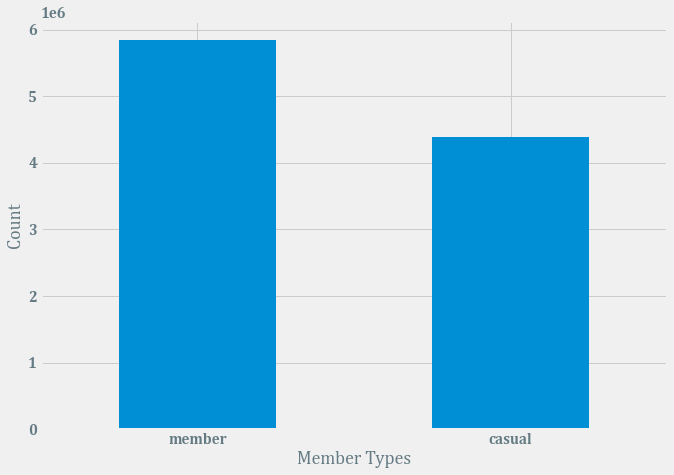

In [31]:
mp.figure(figsize=(10,7))
mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'weight' : 'bold',
        'size'   : 15}

mp.rc('font', **font)

count_plot = data["member_casual"].value_counts().plot.bar(rot=0)
count_plot.tick_params(color="black")
count_plot.set(xlabel="Member Types", ylabel="Count")

In [32]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,month-day,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [33]:
data.rename(columns={'month-day': 'year-month'}, inplace=True)